# Exercise 3d)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
def loglikelihood(X, P, pi_vector):
    """
    Returns the log likelihood of our mixture of multivariate Bernoulli distributions

    Inputs
    X: data matrix of size N by D
    P: matrix of size K by D, contains Bernoulli parameters
    pi_vector: vector of size K, contains probability of being in k-th multivariate Bernoulli distribution

    Outputs:
    loglikelihood: scalar
    """
    #Load N, D and K
    N,D = X.shape
    K = len(pi_vector)
    #log likelihood thus we are summing over all individual log likelihoods
    loglikelihood = 0
    for n in range(N):
        n_th_likelihood = []
        for k in range(K):
            n_th_likelihood.append(pi_vector[k] * np.prod((P[k,:]**X[n,:])*((1-P[k,:])**(1-X[n,:])))) #vectorising the prod over D of (p_d^x_d) (1-p_d)^(1-x_d)
        loglikelihood += np.log(np.sum(n_th_likelihood)) #likelihood is the sum of the likelihood of every image 

    return loglikelihood
        

def estep(X, P, pi_vector):
    """ 
    Executes E-step, returning the updated responsabilites matrix of size N by K

    Inputs
    X: data matrix of size N by D
    P: matrix of size K by D, contains Bernoulli parameters
    pi_vector: vector of size K, contains probability of being in k-th multivariate Bernoulli distribution

    Outputs:
    r_matrix: numpy array of size N by K, containing the responsabilities for every image over every k
    """
    #Load N,D and K
    N,D = X.shape
    K = len(pi_vector)
    #Define new r_matrix
    r_matrix = np.zeros(shape=(N,K))
    for n in range(N):
        #This will be the updated n_th row
        n_th_r_matrix_row = np.zeros(K)
        for k in range(K):
            n_th_r_matrix_row[k] = pi_vector[k] * np.prod((P[k,:]**X[n,:])*((1-P[k,:])**(1-X[n,:]))) #vectorising the prod over D again

        r_matrix[n,:] = n_th_r_matrix_row/np.sum(n_th_r_matrix_row) #Can add each n_th row
    
    return r_matrix


def mstep(X, r_matrix):
    """ 
    Executes M-step, returning updated P matrix and pi_vector vector

    Inputs
    X: data matrix of size N by D
    r_matrix: matrix of size N by K, containing the responsabilities for every image over every k

    Outputs:
    new_P: matrix of size K by D, contains updated Bernoulli parameters
    new_pi_vector: vector of size K, contains updated probabilities of being in k-th multivariate Bernoulli distribution
    """
    #Load N,D and K
    N,D = X.shape
    N,K = r_matrix.shape
    #Define new P matrix and pi_vector vector
    new_P = np.zeros(shape=(K,D))
    new_pi_vector = np.zeros(K)
    #Fill their k-th rows
    for k in range(K):
        new_P[k,:] = np.sum(r_matrix[:,k] * np.transpose(X),axis=1) / np.sum(r_matrix[:,k])
        
        new_pi_vector[k] = np.sum(r_matrix[:,k])/N
    
    return new_P, new_pi_vector


def EM_K(X, K, iterations, convergence_value):
    """ 
    Execute EM step with specified K an iterations amount of time or until the difference of loglikelihood is less than convergence_value

    Inputs:
    X: data matrix of size N by D
    K: number of multivariate Bernoulli distributions in the mixture
    P: matrix of size K by D, contains Bernoulli parameters
    pi_vector: vector of size K, contains probability of being in k-th multivariate Bernoulli distribution
    iterations: self explanatory
    convergence_value: do not execute EM step if difference of loglikelihood is less than convergence_value
    """
    #Initialisations
    N,D = X.shape
    #pi_vector
    pi = np.random.rand(K)
    pi_vector = pi/sum(pi)
    #P matrix
    P = np.random.rand(K,D)




    #Create list to record every iteration's likelihood
    log_likelihood_list = []
    log_likelihood_list.append(loglikelihood(X, P, pi_vector))
    for i in range(iterations):
        #Execute E-Step and acquire new r_matrix
        r_matrix = estep(X,P,pi_vector)
        #Execute M-Step with updated r_matrix and acquire new P and pi_vector
        P, pi_vector = mstep(X, r_matrix)
        #Save log likelihood of new iteration
        log_likelihood_list.append(loglikelihood(X, P, pi_vector))
        if np.abs(log_likelihood_list[i] - log_likelihood_list[i+1]) < convergence_value:
            break
    return log_likelihood_list, P, pi_vector, r_matrix

In [113]:
# We set all variables that are needed

# Data
X = np.loadtxt('binarydigits.txt')
N,D = X.shape

# K multivariate Bernoulli
K = 10

# pi_k vector
pi = np.random.rand(K)
pi_k = pi/sum(pi)

# P matrix
P = np.random.rand(K,D)

iterations = 100
log_likelihood_list = []
log_likelihood_list.append(loglikelihood(X, P, pi_k))
for i in range(iterations):
    r_matrix = estep(X,P,pi_k)
    P, pi_k = mstep(X, r_matrix)
    log_likelihood_list.append(loglikelihood(X, P, pi_k))

In [114]:
#Data
X = np.loadtxt('binarydigits.txt')
#Define K list:
K_list = [2,3,4,7,10]
#Save progress
P_k_list = []
pi_vector_k_list = []
r_matrix_k_list = []

#Run EM for each K
plt.figure(figsize=(10,8))
for K in K_list:
    log_likelihood_list_k, P_k, pi_vector_k, r_matrix_k = EM_K(X, K, iterations = 100, convergence_value = 0.0001) #Define iterations and convergence value
    #Record progress
    P_k_list.append(P_k)
    pi_vector_k_list.append(pi_vector_k)
    r_matrix_k_list.append(r_matrix_k)
    #Plot results
    iterations = np.linspace(0, len(log_likelihood_list_k), len(log_likelihood_list_k))
    #print("For K = " + str(K) + " , the pi_vector is " + str(pi_vector_k) + "\n")
    #print("For K = " + str(K) + " , the r_matrix is " + str(r_matrix_k))
    plt.plot(iterations, log_likelihood_list_k, label = "K = " + str(K))

plt.legend(loc='upper right')
plt.xlabel('Iterations', fontsize = 15)
plt.ylabel('Log Likelihood', fontsize = 15)
plt.grid(axis = "y")
plt.title("Log likelihood vs Iterations", fontsize = 20)

Text(0.5, 1.0, 'Log likelihood vs Iterations')

# Exercise 5e)

Need to plot every P for every different value of K

In [115]:
#When K = 2
plt.figure(figsize=(1.5, 1.5))  
for i, image in enumerate(P_k_list[0]): 
    plt.subplot(1, len(P_k_list[0]), i + 1)
    plt.imshow(np.reshape(image, (8, 8)), interpolation="None", cmap='gray')
    plt.axis('off')

plt.show()

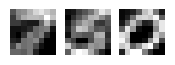

In [116]:
#When K = 3
plt.figure(figsize=(2, 2))  
for i, image in enumerate(P_k_list[1]): 
    plt.subplot(1, len(P_k_list[1]), i +1)
    plt.imshow(np.reshape(image, (8, 8)), interpolation="None", cmap='gray')
    plt.axis('off')

plt.show()

In [117]:
#When K = 4
plt.figure(figsize=(3, 3))  
for i, image in enumerate(P_k_list[2]): 
    plt.subplot(1, len(P_k_list[2]), i +1)
    plt.imshow(np.reshape(image, (8, 8)), interpolation="None", cmap='gray')
    plt.axis('off')

plt.show()

In [118]:
#When K = 7
plt.figure(figsize=(4, 4))  
for i, image in enumerate(P_k_list[3]): 
    plt.subplot(1, len(P_k_list[3]), i +1)
    plt.imshow(np.reshape(image, (8, 8)), interpolation="None", cmap='gray')
    plt.axis('off')

plt.show()

In [119]:
plt.figure(figsize=(6, 6))  
for i, image in enumerate(P_k_list[4]): 
    plt.subplot(1, len(P_k_list[4]), i +1)
    plt.imshow(np.reshape(image, (8, 8)), interpolation="None", cmap='gray')
    plt.axis('off')
plt.show()

# Exercise 5d)
\
In case I had to show my responsabilities matrix, I attach it here

In [120]:
#Print responsabilities matrix for each K
for i in r_matrix_k_list:
    print("Responsabilities matrix for when K = " + str(i.shape[1]))
    print(i)
    print("\n")

Responsabilities matrix for when K = 2
[[1.00000000e+000 8.10382652e-124]
 [1.00000000e+000 3.49731499e-025]
 [9.99999870e-001 1.29932831e-007]
 [7.27881310e-108 1.00000000e+000]
 [7.03671377e-001 2.96328623e-001]
 [1.35326069e-007 9.99999865e-001]
 [1.00000000e+000 4.48753511e-134]
 [1.00000000e+000 2.96739579e-122]
 [4.41511078e-105 1.00000000e+000]
 [1.00000000e+000 2.67280066e-016]
 [4.58873540e-006 9.99995411e-001]
 [1.49389505e-006 9.99998506e-001]
 [1.00000000e+000 1.04085814e-127]
 [5.62987345e-007 9.99999437e-001]
 [1.00000000e+000 2.04757296e-128]
 [1.00000000e+000 3.49312406e-125]
 [1.00000000e+000 9.56207123e-127]
 [2.34077097e-009 9.99999998e-001]
 [1.00000000e+000 5.46437492e-023]
 [1.36636287e-004 9.99863364e-001]
 [1.66776088e-004 9.99833224e-001]
 [1.00000000e+000 1.67805147e-114]
 [1.00000000e+000 6.92008357e-114]
 [1.88351097e-002 9.81164890e-001]
 [1.00000000e+000 1.04927148e-123]
 [1.47913239e-104 1.00000000e+000]
 [1.00000000e+000 1.41980486e-114]
 [8.82157168e-10